In [45]:
import csv, os, re
import nltk
import math
from collections import Counter
import random
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

First, let's list we accomplished in the R file (roughly)

- ~load bike data, air quality and mt cars as a df~
- ~explore data~
    - ~dimensions~
    - ~column names~
    - ~nas per column~
- ~cleaning data~
    - ~look up python and checking for NA.s~
    - ~count the number of NA.s per column in Air Quality~
    - ~create a column in air quality that replaces NA ozone vals w/ mean of ozone vals~
    - ~create a column that is 5* the temperature column, taking NA's into considerations~
    - ~make an arbitrary "distance" column in bike data and standardize it~
    - ~rename the distance column to be "standardized_dist"~
- ~attach a new column called "ride_cost" (random # bt 0 and 10) (at the end)~
- ~attach an arbitrary "ID" column (at the beginning)~
- ~swap the position of 2 columns~
- ~inspect date columns~
    - ~potentially convert~
    - ~(look up best practice)~
    - ~find the difference in days and then in minutes between 2 arbitrary dates~
- ~filtering data~
    - ~remove rows where ride < 5.00 and Member type is casual~
    - ~only give me back the start and stop stations~
- subsetting data
    - ~split into two halves, along the rows~
    - ~rejoin the two halves, row wise (sql union)~
    - join the two halves, column wise (sql join)
- sorting the data
    - ~sort from most expensive ride_cost to least~
    - sort by date taken (descending) and alp. name of station of origin (a-z)
- aggregations
    - ~count the number of unique station destinations~
    - ~count the number of rides that were `4.00`~
    - ~average ride cost~
    - ~average ride cost per end_station, sorted highest cost to lowest~
    - top 5 destinations per day
- correlation 
    - for all possible combos
    - bt wt and mpg
    - return all pairings where x and y have cor of >= .8
- ~5 number summary~
    - ~for mpg~
    - ~for ride cost (bikes)~
- ~simple scatter plot for wt and mpg~
- regressions
    - linear bt wt and mpg
    - look up logistic regression
- simple string replacement
    - ~in data frame, find cols w/ a regex~
    - ~remove all numbers from every element in a list of number-strings like 12345tim13434, 2034983tim0a89~
- simple function
    - write a function that outputs the number of unique values in every column of a data frame

In [2]:
sep = "================================"

In [4]:
# series basic
d = {'name' : 'IBM', 'date' : '2010-09-08', 'shares' : 100, 'price' : 10.2}
ds = pd.Series(d)

print(ds[0])

print(ds.index)

IBM
Index(['name', 'date', 'shares', 'price'], dtype='object')


In [4]:
# df basic 
e = pd.DataFrame({'name': ['AA', 'IBM'], 'shares': [80, 90]})

print(e)
print(sep)
print(e['name'][0])
print(sep)
print(e.loc[0])
print(sep)
print(e.loc[:,'name'])

  name  shares
0   AA      80
1  IBM      90
AA
name      AA
shares    80
Name: 0, dtype: object
0     AA
1    IBM
Name: name, dtype: object


In [22]:
# read file
mtcars = pd.read_csv('data/mtcars.csv', index_col = None)

# rename that first column.
mtcars.rename(columns = {'Unnamed: 0': 'mnm'}, inplace = True)

print(mtcars.head(1))

print(sep)

# total number of rows
print(len(mtcars))

         mnm   mpg  cyl   disp   hp  drat    wt   qsec  vs  am  gear  carb
0  Mazda RX4  21.0    6  160.0  110   3.9  2.62  16.46   0   1     4     4
32


In [6]:
# data access

# access mpg column
mpg = mtcars['mpg'] # this is identical to mtcars.loc[:, 'mpg']

print(mpg[0])

# access wt and hpt columns
print(mtcars[['wt', 'hp']])

# add an indexed "id" column
# mtcars['id'] = np.arange(len(mtcars))

# access 2nd row, print its hp
row2 = mtcars.loc[1, :]

print(row2['hp'])

21.0
       wt   hp
0   2.620  110
1   2.875  110
2   2.320   93
3   3.215  110
4   3.440  175
5   3.460  105
6   3.570  245
7   3.190   62
8   3.150   95
9   3.440  123
10  3.440  123
11  4.070  180
12  3.730  180
13  3.780  180
14  5.250  205
15  5.424  215
16  5.345  230
17  2.200   66
18  1.615   52
19  1.835   65
20  2.465   97
21  3.520  150
22  3.435  150
23  3.840  245
24  3.845  175
25  1.935   66
26  2.140   91
27  1.513  113
28  3.170  264
29  2.770  175
30  3.570  335
31  2.780  109
110


In [7]:
# filtering
# select rows w/ mpg values less than 20
mtcars[mtcars['mpg'] < 20]
print(sep)
# select row w/ mpg < 20 and hp > 200
mtcars[(mtcars['mpg'] < 20) & (mtcars['hp'] > 200)]

,mnm,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


In [8]:
# sorting

# get all cars w/ equal gers and sort them by mnm descending
mtcars[mtcars['gear'] == 3].sort_values('mnm', ascending = False)

,mnm,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [56]:
# Null values
# let's work with Air quality

airquality = pd.read_csv("data/airquality.csv", index_col = None)

# first let's get rid of that silly column
airquality.drop('Unnamed: 0', axis = 1, inplace = True)

print(airquality.head(2))
print(sep)
# count the null ozone vals
print(sum(pd.isnull(airquality['Ozone'])))
print(sep)

# make a list of all valid ozone entries
ozone_good = [v for v in airquality['Ozone'] if pd.notnull(v)]

# replace nan w/ '0.0' for the ozone list...
ozone_rep = airquality['Ozone'].fillna(0.0)
print(ozone_rep)

# get every row that contains a nan value anywhere.
airquality_na_df = airquality

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
37
0      41.0
1      36.0
2      12.0
3      18.0
4       0.0
       ... 
148    30.0
149     0.0
150    14.0
151    18.0
152    20.0
Name: Ozone, Length: 153, dtype: float64


In [10]:
# function that returns every row containing a nan. handy!
def nans(df): return df[df.isnull().any(axis=1)]

# function that counts the number of nan's per column. returns as dict!
def column_null_counter(nans_df):
    d = {}
    
    for c in nans_df.columns:
        d[c] = len([v for v in nans_df[c] if pd.isnull(v)])
    
    return d

nulls = nans(airquality)

nulls.head()

results = column_null_counter(nulls)

print(results)

{'Ozone': 37, 'Solar.R': 7, 'Wind': 0, 'Temp': 0, 'Month': 0, 'Day': 0}


In [11]:
# in-depth with strings...
# find every car that has a p in its name
mtcars[mtcars['mnm'].str.lower().str.contains("p")]

# use a regular expression to find cars whose mnm is 3 units
# e.g. "toyota corrola s"
mtcars[mtcars['mnm'].str.lower().str.match('[a-z]+\s[a-z]+\s[a-z]+')]

,mnm,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.17,14.5,0,1,5,4


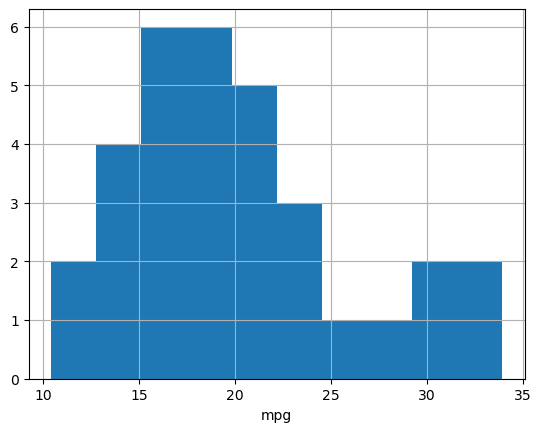

In [12]:
# basic plot
# plot mtcars mpg as a histogram
mtcars.mpg.hist()
plt.xlabel("mpg");
plt.show()

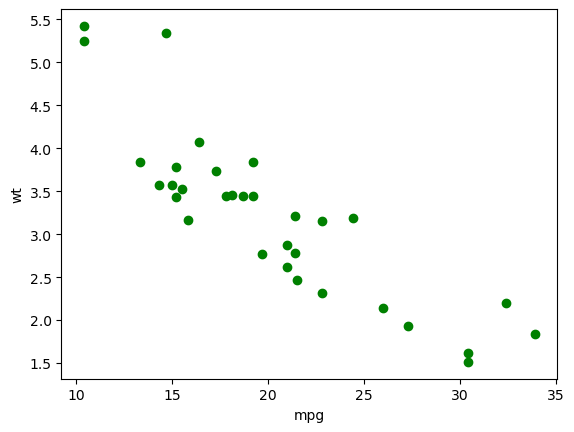

In [13]:
# plot mtcars mpg vs weight as scatter plot
plt.scatter(mtcars.mpg, mtcars.wt, c="g")
plt.xlabel("mpg")
plt.ylabel("wt")
plt.show()

In [5]:
# aggregation and group by

bike_data = pd.read_csv("data/2017Q1-capitalbikeshare-tripdata.csv", index_col = None)

print(bike_data.columns)

print(sep)

# the number of casual riders
print(bike_data.groupby(['Member type']).size()['Casual'])

# group by start_date and start_station

# b_agg = pd.DataFrame(bike_data.groupby(['Start date', 'Start station']))

# print(b_agg.head())
# print(sep)

# test desc
print(bike_data.Duration.describe())
print(bike_data.Duration.describe()['std'])

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')
118076
count    646510.000000
mean       1010.444949
std        2087.021859
min          60.000000
25%         373.000000
50%         626.000000
75%        1064.000000
max       86066.000000
Name: Duration, dtype: float64
2087.021858731844


In [9]:
# "pipeline" averages and stuff w/ aggregating...
# get the sum of the durations per start startion
bike_data.groupby(['Start station']).head(1)

## okay, that returns 3 columns... things it was able to group on
## start station but also start station no. and end station no.

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual
6,473,2017-01-01 00:08:36,2017-01-01 00:16:29,31611,13th & H St NE,31616,3rd & H St NE,W20340,Member
7,200,2017-01-01 00:11:07,2017-01-01 00:14:27,31104,Adams Mill & Columbia Rd NW,31121,Calvert St & Woodley Pl NW,W20398,Member
...,...,...,...,...,...,...,...,...,...
456420,1573,2017-03-08 13:03:47,2017-03-08 13:30:01,31413,3rd & Underwood St NW,32024,Fenton St & Gist Ave,W01003,Member
457852,765,2017-03-08 15:37:48,2017-03-08 15:50:33,31521,18th & Monroe St NE,31516,Rhode Island Ave Metro,W20314,Member
466095,1301,2017-03-09 09:23:27,2017-03-09 09:45:08,31414,Georgia Ave & Piney Branch Rd NW,31267,17th St & Massachusetts Ave NW,W20052,Member
568527,481,2017-03-24 12:31:06,2017-03-24 12:39:07,31294,7th & E St SW,31271,Constitution Ave & 2nd St NW/DOL,W20658,Member


In [10]:
### find the maximum duration, grouped by start station
bike_data.groupby(['Start station'])['Duration'].max().sort_values(ascending = False)

Start station
19th St & Constitution Ave NW     86066
14th St & New York Ave NW         86036
Georgetown Harbor / 30th St NW    85980
3rd St & Pennsylvania Ave SE      85713
8th & F St NE                     85695
                                  ...  
Spring Hill Metro                  1970
Grandview & Blueridge Ave          1906
Jones Branch & Westbranch Dr       1577
Broschart & Blackwell Rd           1501
Frederick Ave & Horners Ln         1296
Name: Duration, Length: 452, dtype: int64

In [17]:
# group by start and end station, then pull out the start/end stations plus duration then sort by duration
# have to use a janky lambda here because you can't directly sort after a group by (lame)
bike_data
.groupby(['Start station', 'End station'], as_index = False)[['Start station', 'End station', 'Duration']]
.apply(lambda x: x.sort_values (["Duration"])).head()

Start station     End station  Duration
0 591941  10th & E St NW  10th & E St NW        71
  3540    10th & E St NW  10th & E St NW        84
  462703  10th & E St NW  10th & E St NW       123
  393005  10th & E St NW  10th & E St NW       131
  462704  10th & E St NW  10th & E St NW       141

In [18]:
# get the sum and the max of duration grouped by member type 
bike_data.groupby(['Member type'])['Duration'].agg([np.sum, np.max])

,sum,amax
Member type,,
Casual,288731819,86066
Member,364530945,85980


In [19]:
# make the ride_cost column
randoms = np.random.uniform(low=0.0, high=10.0, size=(len(bike_data,)))
bike_data['ride_cost'] = randoms
bike_data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,ride_cost
0,221,2017-01-01 00:00:41,2017-01-01 00:04:23,31634,3rd & Tingey St SE,31208,M St & New Jersey Ave SE,W00869,Member,9.131399
1,1676,2017-01-01 00:06:53,2017-01-01 00:34:49,31258,Lincoln Memorial,31270,8th & D St NW,W00894,Casual,5.454078
2,1356,2017-01-01 00:07:10,2017-01-01 00:29:47,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W21945,Casual,7.286900
3,1327,2017-01-01 00:07:22,2017-01-01 00:29:30,31289,Henry Bacon Dr & Lincoln Memorial Circle NW,31222,New York Ave & 15th St NW,W20012,Casual,1.833603
4,1636,2017-01-01 00:07:36,2017-01-01 00:34:52,31258,Lincoln Memorial,31270,8th & D St NW,W22786,Casual,0.002482


In [21]:
# count the number of unique station destinations
print(len(set(bike_data['End station number'])))

# count the number of rides that were 4.00
print(len(bike_data[round(bike_data['ride_cost'], 2) == 4.00]))

# average ride cost
round(bike_data['ride_cost'].mean(), 2)

# average ride cost per end_station, sorted highest cost to lowest, top 5
bike_data.groupby('End station')['ride_cost'].mean().sort_values(ascending = False).values[0:5]

452
623


array([6.09144446, 6.0189562 , 5.83723284, 5.79266197, 5.729013  ])

In [15]:
# swap the position of the Member Type and Bike Number
# print(list(bike_data))

# this gets you every column name
col_list = list(bike_data)

# now you can move around your columns of interest
col_list[7], col_list[8] = col_list[8], col_list[7]

# and reassign to the df
bike_data.columns = col_list

# print(list(bike_data))

['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Member type', 'Bike number', 'ride_cost']
['Duration', 'Start date', 'End date', 'Start station number', 'Start station', 'End station number', 'End station', 'Bike number', 'Member type', 'ride_cost']


In [55]:
# top 5 destinations per day (start date)
# still don't really understand how to do this.

# first, convert the start date to a pandas date time
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'])

# next, group by that start date's Day field as well as the end station
# then count the .size() of the pairings (date to end station, one to many)
# then sort the values
gb_size = bike_data.groupby([pd.Grouper(key='Start date', freq='D'), 'End station']).size()

gb_size.groupby('End station').sum().sort_values(ascending=False)

End station
Columbus Circle / Union Station         14660
Massachusetts Ave & Dupont Circle NW    10666
15th & P St NW                           8879
Jefferson Dr & 14th St SW                8411
Lincoln Memorial                         7869
                                        ...  
Traville Gateway Dr & Gudelsky Dr          10
Solutions & Greensboro Dr                   9
Reston Regional Library                     4
Deanwood Rec Center                         4
Broschart & Blackwell Rd                    3
Length: 452, dtype: int64

In [65]:
# calc 5* the temperature
airquality['Temp'] * 5

# do it again but consider na's
[t for t in airquality['Temp'] if pd.notnull(t)]

[(1, 4), (2, 5), (3, 6)]

In [66]:
# combine two lists pairwise into a list of tuples
l = [1,2,3]
m = [4,5,6]

list(zip(l,m))

[(1, 4), (2, 5), (3, 6)]

In [69]:
# make a column on air quality that is random decimals (so we dont just have 0's), and then standardize that column
airquality['rands'] =  np.random.uniform(low=0.0, high=10.0, size=(len(airquality), 1))

# standardize (z-score)
airquality['rands'] = (airquality['rands'] - airquality['rands'].mean()) / airquality['rands'].std()    

# rands is now normally distributed
airquality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,rands
0,41.0,190.0,7.4,67,5,1,-1.388231
1,36.0,118.0,8.0,72,5,2,0.493915
2,12.0,149.0,12.6,74,5,3,-0.578838
3,18.0,313.0,11.5,62,5,4,0.725271
4,NaN,NaN,14.3,56,5,5,-0.180734


In [102]:
# split the data into two halves (row wise)
airquality1 = airquality.loc[:math.ceil(len(airquality)/2), :]
airquality2 = airquality.loc[math.ceil(len(airquality)/2):, :]
# so the first 10 ROWS of any df are df.loc[:10, :]
# airquality2.head()

# recombine that data (row wise, stack)
pd.concat([airquality1, airquality2])

,Ozone,Solar.R,Wind,Temp,Month,Day,rands
0,41.0,190.0,7.4,67,5,1,-1.388231
1,36.0,118.0,8.0,72,5,2,0.493915
2,12.0,149.0,12.6,74,5,3,-0.578838
3,18.0,313.0,11.5,62,5,4,0.725271
4,NaN,NaN,14.3,56,5,5,-0.180734
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,0.676611
149,NaN,145.0,13.2,77,9,27,0.075602
150,14.0,191.0,14.3,75,9,28,1.212961
151,18.0,131.0,8.0,76,9,29,1.765175


In [ ]:
# find the difference in days and in seconds between a random end_date and a random start_date
# https://stackoverflow.com/questions/25646200/python-convert-timedelta-to-int-in-a-dataframe
# attach 2020/20/02 as a temp column, with the pandas date data type
# then just subtract that against the reference column.
# you can get the difference in days with `.dt.days`

In [ ]:
# sort by date taken (descending) and alp. name of station of origin (a-z)

In [29]:
# correlations...

# correlation bt wt and mpg
abs(mtcars['mpg'].corr(mtcars['wt']))

0.8676593765172281

In [46]:
def highest_cor_finder(df, col_of_interest):
    
    highest_val = 0
    highest_column_name = ''
    for col in df.columns:
        if (col != col_of_interest and is_numeric_dtype(df[col])):
            c = abs(df[col_of_interest].corr(df[col]))
            if (c > highest_val):
                highest_val = c
                highest_column_name = col
    
    return highest_column_name, highest_val

In [47]:
print(highest_cor_finder(mtcars, 'mpg'))

('wt', 0.8676593765172281)


In [50]:
# correlation of every combo (matrix)
mtcars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [ ]:
# make a simple Article class that has an "author" and a "title" field. 
## getters and setters and inheritance
# it should extend CreativeWork, which has its own field for "body"
## getters and setters
# create a new article with a prefilled author "john smith" and title "title article"
# change the article title to "Tim is amazing"
# set the body text to "my article here"

In [103]:
# take a list w/ strings and numbers concatenated and return only the strings
l = ['134324timajfdlka3434', '343tim3434']

print([re.sub('[^A-Za-z]', '', entry) for entry in l])

['timajfdlka', 'tim']


In [ ]:
## practice test scrap